<a href="https://colab.research.google.com/github/nihar6697/Task7/blob/main/Task7_3_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
#from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

**Importing the dataset**

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()     #checking null value

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df1 = df.drop(columns="User ID")

In [ ]:
df1.Gender = df.Gender.map({'Male': 0, 'Female': 1})
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [ ]:
df1.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [ ]:
df1 = df1.drop_duplicates()

**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df1[['Gender','Age','EstimatedSalary']].values # fts
y = df1['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0) # train- test split

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
#THIS VALUE IS ACCURACY VALUE

0.868421052631579

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,25,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model

K value  :  1  train score :  1.0  cv score :  0.8718279569892473
K value  :  2  train score :  0.9407894736842105  cv score :  0.8586021505376344
K value  :  3  train score :  0.9375  cv score :  0.8850537634408603
K value  :  4  train score :  0.9210526315789473  cv score :  0.8818279569892473
K value  :  5  train score :  0.9210526315789473  cv score :  0.9047311827956989
K value  :  6  train score :  0.9243421052631579  cv score :  0.9047311827956989
K value  :  7  train score :  0.9177631578947368  cv score :  0.9081720430107527
K value  :  8  train score :  0.9111842105263158  cv score :  0.9081720430107527
K value  :  9  train score :  0.9078947368421053  cv score :  0.9049462365591397
K value  :  10  train score :  0.9144736842105263  cv score :  0.9082795698924733
K value  :  20  train score :  0.9078947368421053  cv score :  0.8883870967741936
K value  :  25  train score :  0.881578947368421  cv score :  0.8753763440860215
K value  :  50  train score :  0.8125  cv score :  0.

In [ ]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.881578947368421

**Predicting the Test set results**

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
  x = data[['Age','EstimatedSalary']].values # independent features
  y = data['Purchased'].astype(int).values # y -> target/true labels 
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k 
  clf.fit(x_train, y_train) # train the model
  print("Train Accuracy : ", clf.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
  print("Val Accuracy : ", np.mean(cross_val_score(clf, x_train, y_train, cv=10)))
  # Plotting decision region
  plot_decision_regions(x_train, y_train, clf=clf, legend=2) # it plots the decision boundary
  ##Adding axes annotations
  plt.xlabel('Age') #Names the x-axis
  plt.ylabel('EstimatedSalary') #Names the y-axis
  plt.title('Knn with K='+ str(k)) #Names the graph
  plt.show() #Displays the graph

1
Train Accuracy :  0.9928571428571429
Val Accuracy :  0.7535714285714287


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


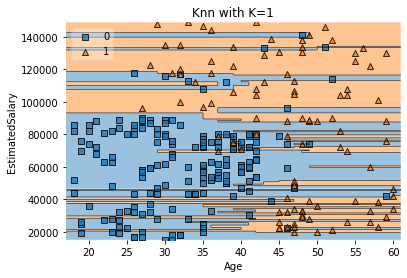

2
Train Accuracy :  0.8678571428571429
Val Accuracy :  0.7428571428571429


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


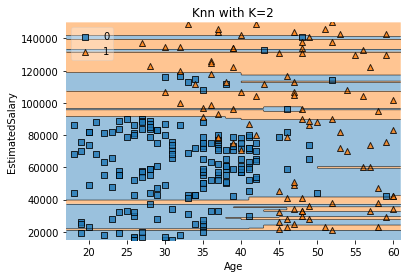

3
Train Accuracy :  0.9107142857142857
Val Accuracy :  0.8357142857142857


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


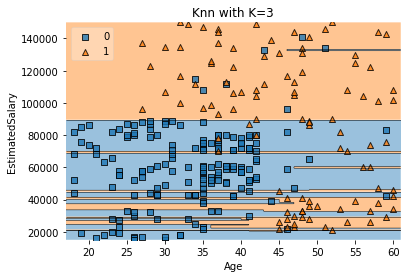

4
Train Accuracy :  0.8321428571428572
Val Accuracy :  0.7857142857142857


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


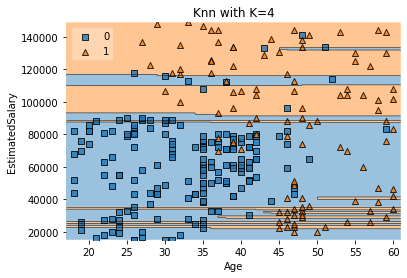

5
Train Accuracy :  0.8892857142857142
Val Accuracy :  0.8357142857142857


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


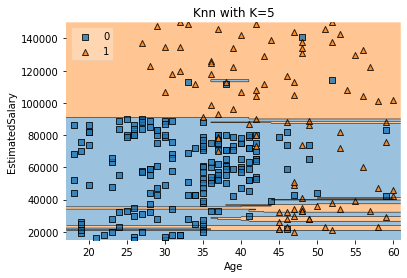

20
Train Accuracy :  0.825
Val Accuracy :  0.8107142857142857


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


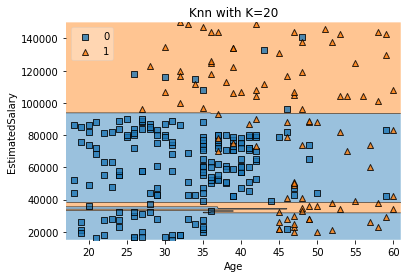

30
Train Accuracy :  0.7928571428571428
Val Accuracy :  0.7857142857142857


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


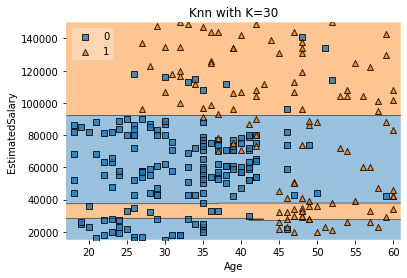

40
Train Accuracy :  0.7821428571428571
Val Accuracy :  0.7821428571428571


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


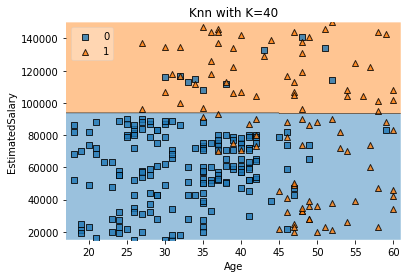

80
Train Accuracy :  0.7285714285714285
Val Accuracy :  0.7214285714285714


/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


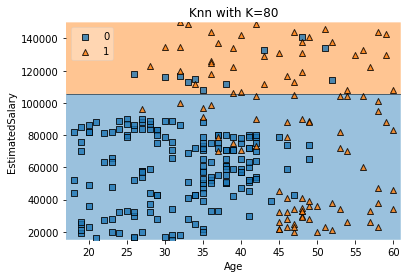

In [ ]:
data1 = pd.read_csv('/content/Social_Network_Ads.csv')
for i in [1,2,3,4,5,20,30,40,80]: #hit n trial
  print(i)
  knn_comparison(data1,i)

**Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_test,y_pred)

array([[48,  5],
       [ 4, 19]])

In [ ]:
f1_score(y_test,y_pred)

0.8085106382978724

In [ ]:
knn.score(X_test,y_test)

0.881578947368421

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


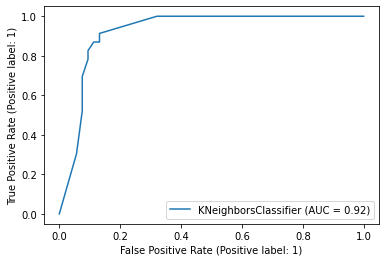

In [ ]:
plot_roc_curve(knn, X_test, y_test)